<a href="https://colab.research.google.com/github/nantsing/github-slideshow/blob/master/torch_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

导入torch、numpy和matploylib



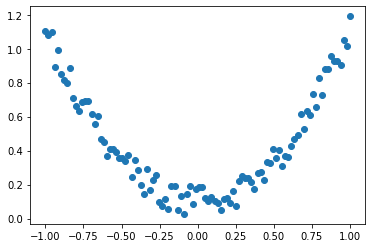

In [124]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size());

x, y = Variable(x), Variable(y);

#print(x)
#print(y)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [125]:
class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden)
    self.predict = torch.nn.Linear(n_hidden, n_output)

  def forward(self, x):
    x = F.relu(self.hidden(x))
    x = self.predict(x)
    return x

net = Net(1, 10, 1) #一个feature，十个神经元，一个输出；
print(net)

#prediction = net(x)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


建立神经网络

In [ ]:
plt.ion()
plt.show()

optimizer = torch.optim.SGD(net.parameters(), lr=0.5) #lr = learning rate
loss_func = torch.nn.MSELoss()

for t in range(100):
  prediction = net(x)

  loss = loss_func(prediction, y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if t % 5 == 0:
    #plot and show learing process
    plt.cla()
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.text(0.5, 0, 'Loss=%.4f' % loss.data, fontdict = {'size':20, 'color': 'red', })
    plt.pause(0.1)

plt.ioff()
plt.show()

